In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [104]:
#Loading data from csv file to pandas dataframe
car_dataset=pd.read_csv(r'C:\Users\poorna\Documents\Soundarya projects\ML Projects\car_price prediction project\car_price_prediction.csv')

In [385]:
data=car_dataset.drop(['Levy', 'Manufacturer', 'Model','Engine volume', 'Mileage', 'Drive wheels','Doors', 'Color'], axis=1)

### Understanding the data

In [386]:
data

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
0,45654403,13328,2010,Jeep,Yes,Hybrid,6.0,Automatic,Left wheel,12
1,44731507,16621,2011,Jeep,No,Petrol,6.0,Tiptronic,Left wheel,8
2,45774419,8467,2006,Hatchback,No,Petrol,4.0,Variator,Right-hand drive,2
3,45769185,3607,2011,Jeep,Yes,Hybrid,4.0,Automatic,Left wheel,0
4,45809263,11726,2014,Hatchback,Yes,Petrol,4.0,Automatic,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,1999,Coupe,Yes,CNG,4.0,Manual,Left wheel,5
19233,45778856,15681,2011,Sedan,Yes,Petrol,4.0,Tiptronic,Left wheel,8
19234,45804997,26108,2010,Jeep,Yes,Diesel,4.0,Automatic,Left wheel,4
19235,45793526,5331,2007,Jeep,Yes,Diesel,4.0,Automatic,Left wheel,4


In [387]:
#inspecting first 5 rows of dataframe
data.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
0,45654403,13328,2010,Jeep,Yes,Hybrid,6.0,Automatic,Left wheel,12
1,44731507,16621,2011,Jeep,No,Petrol,6.0,Tiptronic,Left wheel,8
2,45774419,8467,2006,Hatchback,No,Petrol,4.0,Variator,Right-hand drive,2
3,45769185,3607,2011,Jeep,Yes,Hybrid,4.0,Automatic,Left wheel,0
4,45809263,11726,2014,Hatchback,Yes,Petrol,4.0,Automatic,Left wheel,4


In [388]:
#inspecting last 5 rows of dataframe
data.tail()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
19232,45798355,8467,1999,Coupe,Yes,CNG,4.0,Manual,Left wheel,5
19233,45778856,15681,2011,Sedan,Yes,Petrol,4.0,Tiptronic,Left wheel,8
19234,45804997,26108,2010,Jeep,Yes,Diesel,4.0,Automatic,Left wheel,4
19235,45793526,5331,2007,Jeep,Yes,Diesel,4.0,Automatic,Left wheel,4
19236,45813273,470,2012,Sedan,Yes,Hybrid,4.0,Automatic,Left wheel,12


In [390]:
#checking number of rows and columns
data.shape

(19237, 10)

In [389]:
data.columns

Index(['ID', 'Price', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Wheel', 'Airbags'],
      dtype='object')

In [391]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [392]:
#checking information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Cylinders         19237 non-null  float64
 7   Gear box type     19237 non-null  object 
 8   Wheel             19237 non-null  object 
 9   Airbags           19237 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


In [393]:
data.nunique()

ID                  18924
Price                2315
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Cylinders              13
Gear box type           4
Wheel                   2
Airbags                17
dtype: int64

In [394]:
#example
data['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [395]:
#Checking number of null values
data.isnull().sum()

ID                  0
Price               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Cylinders           0
Gear box type       0
Wheel               0
Airbags             0
dtype: int64

In [473]:
#checking the disrtibution of categorical data
print(data['Fuel type'].value_counts())
print(data['Wheel'].value_counts())
print(data['Gear box type'].value_counts())
print(data['Leather interior'].value_counts())
print(data['Category'].value_counts())

Fuel type
0    10150
1     4036
2     3578
3      892
4      494
5       86
6        1
Name: count, dtype: int64
Wheel
0    17753
1     1484
Name: count, dtype: int64
Gear box type
0    13514
1     3102
2     1875
3      746
Name: count, dtype: int64
Leather interior
0    13954
1     5283
Name: count, dtype: int64
Category
0     8736
1     5473
2     2847
3      647
4      532
5      364
6      306
7      233
8       52
9       36
10      11
Name: count, dtype: int64


### Encoding the categorical data


In [399]:
#Encoding "fuel type" column

data.replace({"Fuel type":{"Petrol":0, "Diesel":1, "Hybrid":2, "LPG":3, "CNG":4, "Plug-in Hybrid":5, "Hydrogen":6}},inplace=True)

  #Encoding "wheel" column
data.replace({"Wheel":{"Left wheel":0, "Right-hand drive":1}},inplace=True)
                           
 #Encoding "gear box type" column
data.replace({"Gear box type":{"Automatic":0, "Tiptronic":1, "Manual":2, "Variator":3}},inplace=True)
                               
 #Encoding "leather" column
data.replace({"Leather interior":{"Yes":0, "No":1}},inplace=True) 
                   
 
                               
 #Encoding "category" column
data.replace({"Category":{"Sedan":0, "Jeep":1, "Hatchback":2, "Minivan":3, "Coupe":4, "Universal":5, "Microbus":6, "Goods wagon":7, "Pickup":8, "Cabriolet":9, "Limousine": 10}},inplace=True)
                              
                               

                                        
                    
                          
                          
                        

In [400]:
print(data.columns)

Index(['ID', 'Price', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Wheel', 'Airbags'],
      dtype='object')


In [401]:
data.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
0,45654403,13328,2010,1,0,2,6.0,0,0,12
1,44731507,16621,2011,1,1,0,6.0,1,0,8
2,45774419,8467,2006,2,1,0,4.0,3,1,2
3,45769185,3607,2011,1,0,2,4.0,0,0,0
4,45809263,11726,2014,2,0,0,4.0,0,0,4


In [402]:
#splitting data and target

x=data.drop(['Price', 'ID'], axis=1)
y=data['Price']

In [403]:
print(x)

       Prod. year  Category  Leather interior  Fuel type  Cylinders  \
0            2010         1                 0          2        6.0   
1            2011         1                 1          0        6.0   
2            2006         2                 1          0        4.0   
3            2011         1                 0          2        4.0   
4            2014         2                 0          0        4.0   
...           ...       ...               ...        ...        ...   
19232        1999         4                 0          4        4.0   
19233        2011         0                 0          0        4.0   
19234        2010         1                 0          1        4.0   
19235        2007         1                 0          1        4.0   
19236        2012         0                 0          2        4.0   

       Gear box type  Wheel  Airbags  
0                  0      0       12  
1                  1      0        8  
2                  3      1   

In [404]:
print(y)

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64


In [405]:
#splitting data into traing and test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [432]:
data.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
0,45654403,13328,2010,1,0,2,6.0,0,0,12
1,44731507,16621,2011,1,1,0,6.0,1,0,8
2,45774419,8467,2006,2,1,0,4.0,3,1,2
3,45769185,3607,2011,1,0,2,4.0,0,0,0
4,45809263,11726,2014,2,0,0,4.0,0,0,4


## Model Training

In [433]:
#Loading the linear regression model

In [474]:
lin_reg_model=LinearRegression()

In [434]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [435]:
#Prediction on traing data
training_data_prediction=lin_reg_model.predict(x_train)

In [436]:
# R squared error
error_score=metrics.r2_score(y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.1482832931210456


In [413]:
#Visualize the actual price and predicted price

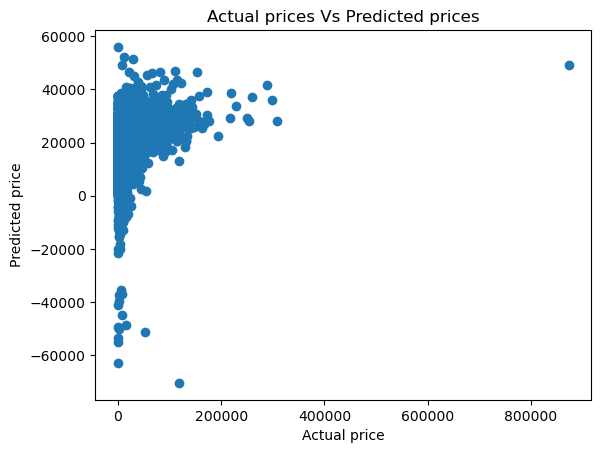

In [415]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices Vs Predicted prices")
plt.show()

In [437]:
#Prediction on test data
test_data_prediction=lin_reg_model.predict(x_test)

In [427]:
# R squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : -1.3556580306994803e-05


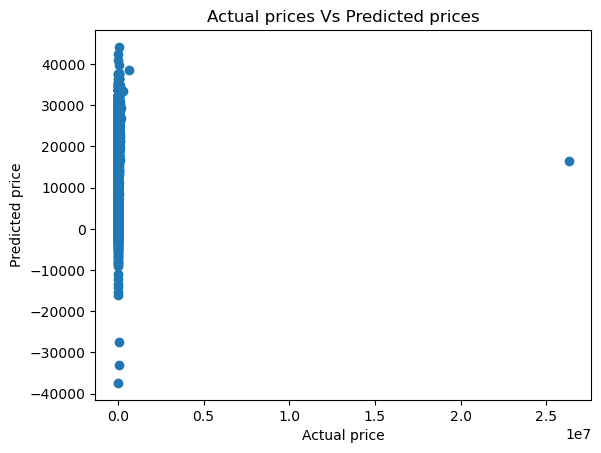

In [438]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices Vs Predicted prices")
plt.show()

### Lasso Regression

In [463]:
#Loading the linear regression model
lass_reg_model=Lasso()

In [464]:
#Loading the linear regression model
lass_reg_model.fit(x_train, y_train)

Lasso()

## Model Evaluation

In [465]:
#Prediction on target data
training_data_prediction=lass_reg_model.predict(x_train)

In [466]:
# R squared error
error_score=metrics.r2_score(y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.14828323328616266


In [467]:
#Visualize the actual price and predicted price

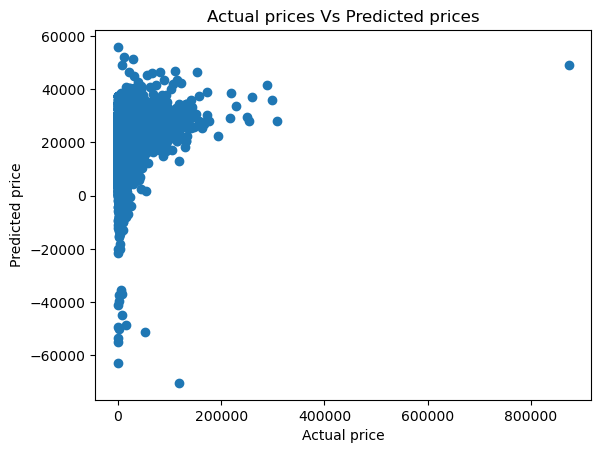

In [468]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices Vs Predicted prices")
plt.show()

In [469]:
#Prediction on test data
test_data_prediction=lass_reg_model.predict(x_test)

In [470]:
# R squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : -1.4034963204068163e-05


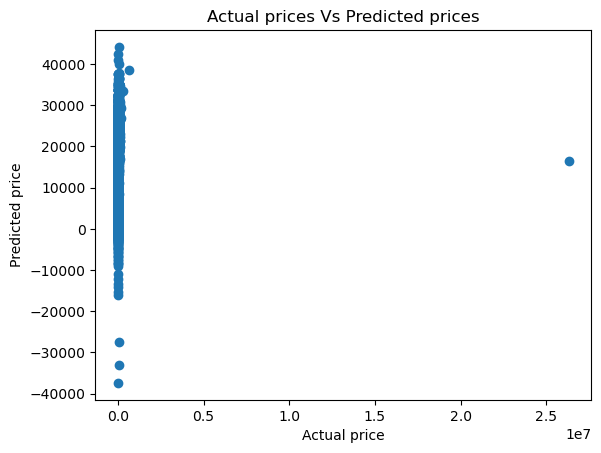

In [471]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices Vs Predicted prices")
plt.show()